In [2]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_milestones = 'Milestones - timesStandard-prod.csv'
#results_milestones = 'Milestones - timeStandard-prod-fill-nan.csv'
dataBinary_milestones = pd.read_csv(results_milestones)


In [3]:
dataBinary_milestones

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,sound solution,alternative answer,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18.0,18.0,19.0,21.0,21.0,24.0,...,n,NaN,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,y,NaN,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,...,y,y,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,n,NaN,y,y,Control,4612,1.0,1.0,NaN,NaN
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,y,y,y,y,Treatment,5069,NaN,NaN,4.0,2.0
6,ap3535@nau.edu,4:17 PM,6,12,27.0,27.0,29.0,40.0,41.0,43.0,...,y,NaN,y,y,Control,5485,NaN,NaN,NaN,NaN
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,n,NaN,y,y,Control,5485,1.0,1.0,NaN,NaN
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,y,NaN,y,y,Treatment,5485,NaN,NaN,2.0,0.0
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,y,NaN,y,NaN,Treatment,5485,NaN,NaN,5.0,1.0


In [4]:
#checking if I have to remove the NaN. Removing jk2396 to calculate the 'method' mean 

In [5]:
dataBinary_milestones.columns

Index(['Participant', 'start', 'issue', 'problem', 'folder', 'file', 'class',
       'method', 'line', 'solution', 'implement', 'end', 'changed issue',
       'changed folder', 'changed file', 'changed class', 'changed method',
       'right folder', 'right file', 'right class', 'right method',
       'right lines', 'Correctness Explanation', 'correct', 'sound solution',
       'alternative answer', 'Gift card requested', 'Gift card received',
       'group', 'issue_number', 'Control YOE', 'Control Contribs', 'Alt YOE',
       'Alt Contrib'],
      dtype='object')

In [6]:
dataBinary_milestones_valid = dataBinary_milestones[['Participant','start','issue','problem','folder','file','class','method','line','solution','implement','end','group','issue_number','changed issue',
       'changed folder', 'changed file', 'changed class', 'changed method',
       'right folder', 'right file', 'right class', 'right method',
       'right lines', 'Correctness Explanation', 'correct', 'sound solution']]

In [7]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ap3535@nau.edu'].index, inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'ItaloSantos'].index, inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
dataBinary_milestones_valid

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,0,0,y,y,y,y,y,Completed the code changes in the right place ...,y,y
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,0,0,NaN,y,y,y,y,Completed the code changes in the right place.,y,y
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n


In [87]:

#dataBinary_milestones_valid[['issue','problem','folder','file','classe','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [88]:
#dataBinary_milestones_valid['issue'].plot(kind='line',  ms=10)

#plt.show()

In [89]:
dataBinary_milestones_valid.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number,changed issue,changed folder,changed file,changed class,changed method
group,,,,,,,,,,,,,,,,
Control,9.166667,21.833333,41.800,42.000,44.400,46.800000,53.500000,55.750000,57.333333,52.500,5055.333333,0.0,0.0,0.000,0.000,0.0
Treatment,6.125000,22.125000,40.125,40.625,40.875,39.166667,39.833333,45.428571,44.600000,52.125,5259.750000,0.0,0.5,0.375,0.125,0.0


In [90]:
dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid.drop(dataBinary_milestones_valid[dataBinary_milestones_valid['Participant'] == 'jk2396@nau.edu'].index)


In [91]:
dataBinary_milestones_valid_jk2396

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,0,0,y,y,y,y,y,Completed the code changes in the right place ...,y,y
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
3,sb3292@nau.edu,4:21:00 PM,3,19,23.0,23.0,23.0,27.0,27.0,46.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,0,0,NaN,y,y,y,y,Completed the code changes in the right place.,y,y
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n


In [92]:
#dataBinary_milestones_valid_jk2396 = dataBinary_milestones_valid_jk2396['method']

In [93]:
dataBinary_milestones_valid_jk2396[['method','group']].groupby(['group']).mean()

,method
group,
Control,46.800000
Treatment,39.166667


In [94]:
dataBinary_milestones_valid_T = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

In [95]:
dataBinary_milestones_valid_C = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']

In [96]:
#dataBinary_milestones_valid_T[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [97]:
#dataBinary_milestones_valid_C[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='line',  ms=10)

#plt.show()

In [98]:
dataBinary_milestones_valid.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,changed issue,changed folder,changed file,changed class,changed method
issue_number,,,,,,,,,,,,,,,
4612,9.00,14.0,41.666667,41.666667,42.333333,36.0,41.00,50.0,56.00,55.00,0.0,0.666667,0.666667,0.0,0.0
5069,10.25,32.5,39.750000,40.750000,43.750000,46.0,50.00,50.5,49.00,52.75,0.0,0.000000,0.000000,0.0,0.0
5194,3.00,19.0,23.000000,23.000000,23.000000,27.0,27.00,46.0,46.00,46.00,0.0,0.000000,0.000000,0.0,0.0
5485,6.00,18.0,44.500000,44.750000,44.750000,45.5,45.75,46.0,48.75,50.00,0.0,0.200000,0.000000,0.0,0.0
5679,3.00,27.0,45.000000,45.000000,45.000000,50.0,52.00,59.0,NaN,60.00,0.0,1.000000,1.000000,1.0,0.0


In [99]:
dataBinary_milestones_valid.groupby(['group','issue_number']).mean()

issue    problem     folder  file  class  method  \
group     issue_number                                                         
Control   4612          13.000000  18.000000  34.500000  34.5   34.5    36.0   
          5069           6.500000  33.000000  42.000000  42.5   48.5    53.0   
          5485           8.000000  14.500000  56.000000  56.0   56.0    56.0   
Treatment 4612           1.000000   6.000000  56.000000  56.0   58.0     NaN   
          5069          14.000000  32.000000  37.500000  39.0   39.0    32.0   
          5194           3.000000  19.000000  23.000000  23.0   23.0    27.0   
          5485           4.666667  20.333333  40.666667  41.0   41.0    42.0   
          5679           3.000000  27.000000  45.000000  45.0   45.0    50.0   

                             line   solution  implement   end  changed issue  \
group     issue_number                                                         
Control   4612          41.000000  50.000000  56.000000  53.5            0.0   
          5069          58.500000  58.500000  60.000000  58.5            0.0   
          5485          56.000000  56.000000  56.000000  45.5            0.0   
Treatment 4612                NaN        NaN        NaN  58.0            0.0   
          5069          33.000000  42.500000  38.000000  47.0            0.0   
          5194          27.000000  46.000000  46.000000  46.0            0.0   
          5485          42.333333  42.666667  46.333333  53.0            0.0   
          5679          52.000000  59.000000        NaN  60.0            0.0   

                        changed folder  changed file  changed class  \
group     issue_number                                                
Control   4612                0.000000           0.0            0.0   
          5069                0.000000           0.0            0.0   
          5485                0.000000           0.0            0.0   
Treatment 4612                2.000000           2.0            0.0   
          5069                0.000000           0.0            0.0   
          5194                0.000000           0.0            0.0   
          5485                0.333333           0.0            0.0   
          5679                1.000000           1.0            1.0   

                        changed method  
group     issue_number                  
Control   4612                     0.0  
          5069                     0.0  
          5485                     0.0  
Treatment 4612                     0.0  
          5069                     0.0  
          5194                     0.0  
          5485                     0.0  
          5679                     0.0

In [100]:
dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,changed issue,changed folder,changed file,changed class,changed method
issue_number,,,,,,,,,,,,,,,
4612,1.000000,6.000000,56.000000,56.0,58.0,NaN,NaN,NaN,NaN,58.0,0.0,2.000000,2.0,0.0,0.0
5069,14.000000,32.000000,37.500000,39.0,39.0,32.0,33.000000,42.500000,38.000000,47.0,0.0,0.000000,0.0,0.0,0.0
5194,3.000000,19.000000,23.000000,23.0,23.0,27.0,27.000000,46.000000,46.000000,46.0,0.0,0.000000,0.0,0.0,0.0
5485,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0,0.0,0.333333,0.0,0.0,0.0
5679,3.000000,27.000000,45.000000,45.0,45.0,50.0,52.000000,59.000000,NaN,60.0,0.0,1.000000,1.0,1.0,0.0


In [101]:
dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,changed issue,changed folder,changed file,changed class,changed method
issue_number,,,,,,,,,,,,,,,
4612,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5,0.0,0.0,0.0,0.0,0.0
5069,6.5,33.0,42.0,42.5,48.5,53.0,58.5,58.5,60.0,58.5,0.0,0.0,0.0,0.0,0.0
5485,8.0,14.5,56.0,56.0,56.0,56.0,56.0,56.0,56.0,45.5,0.0,0.0,0.0,0.0,0.0


In [102]:
T_mean = dataBinary_milestones_valid_T.groupby(['issue_number']).mean()

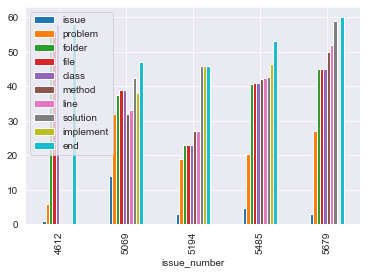

In [103]:
T_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

In [104]:
C_mean = dataBinary_milestones_valid_C.groupby(['issue_number']).mean()

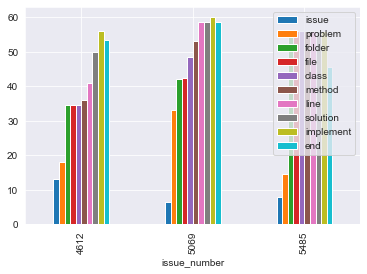

In [105]:
C_mean[['issue','problem','folder','file','class','method','line','solution','implement','end']].plot(kind='bar')

plt.show()

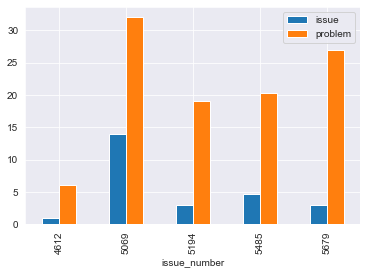

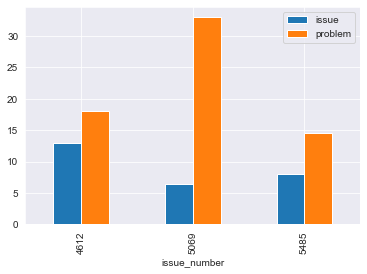

In [106]:
T_mean[['issue','problem']].plot(kind='bar')
C_mean[['issue','problem']].plot(kind='bar')

plt.show()

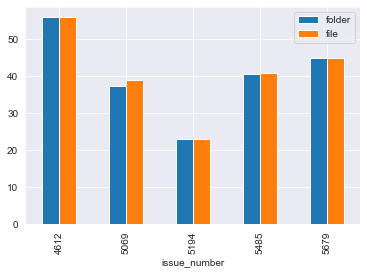

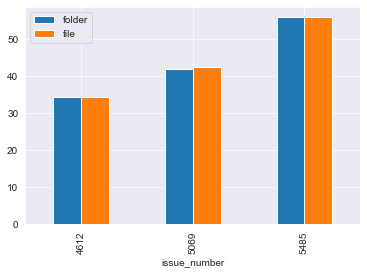

In [107]:
T_mean[['folder','file']].plot(kind='bar')
C_mean[['folder','file']].plot(kind='bar')

plt.show()

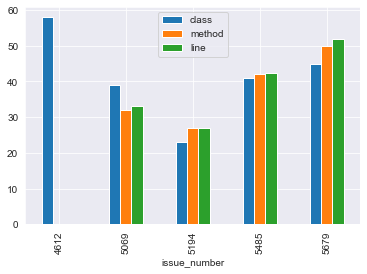

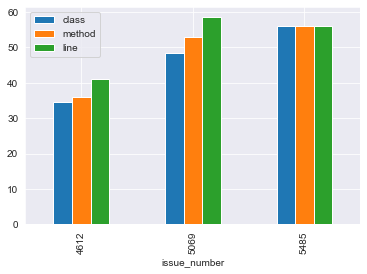

In [108]:
T_mean[['class','method', 'line']].plot(kind='bar')
C_mean[['class','method', 'line']].plot(kind='bar')

plt.show()

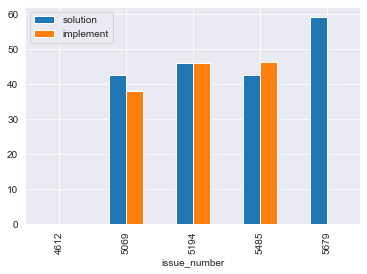

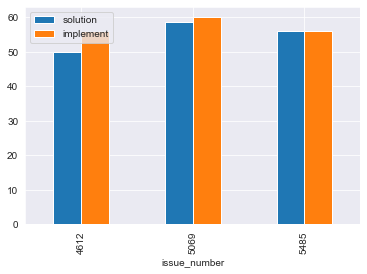

In [109]:
T_mean[['solution','implement']].plot(kind='bar')
C_mean[['solution','implement']].plot(kind='bar')

plt.show()

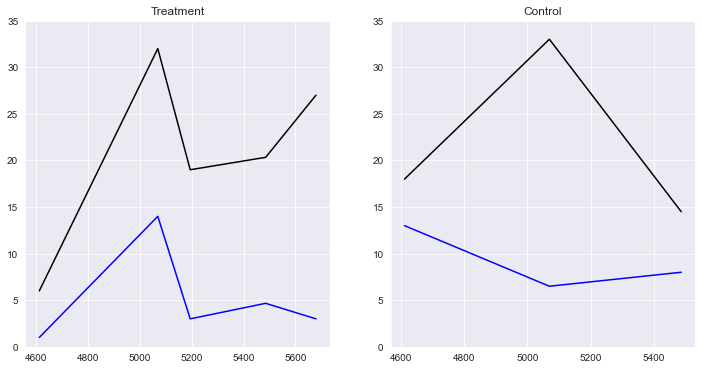

In [110]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_title('Treatment')
ax.plot(T_mean['issue'], color='blue', label='Treatment issue')
ax.plot(T_mean['problem'], color='black', label='Treatment problem')

ax2.set_title('Control')
ax2.plot(C_mean['issue'], color='blue', label='Control issue')
ax2.plot(C_mean['problem'], color='black', label='Control problem')

ax.set_ylim([0, 35])
ax2.set_ylim([0, 35])

plt.show()


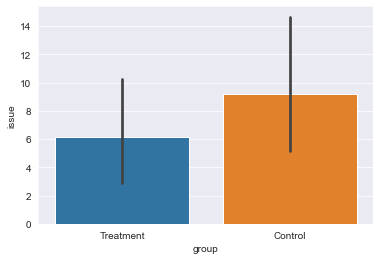

In [111]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "issue", data = dataBinary_milestones_valid)
plt.show()

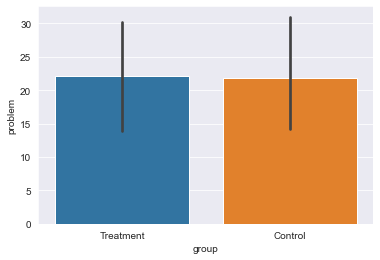

In [112]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = dataBinary_milestones_valid)
plt.show()

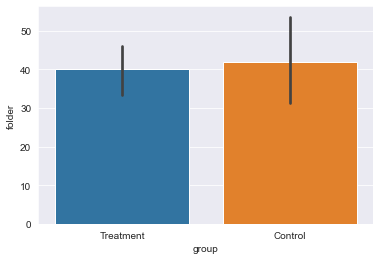

In [113]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = dataBinary_milestones_valid)
plt.show()

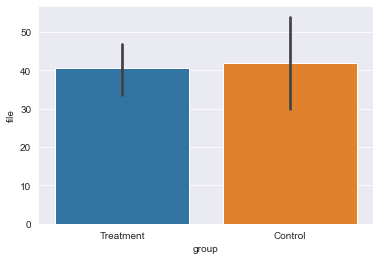

In [114]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = dataBinary_milestones_valid)
plt.show()

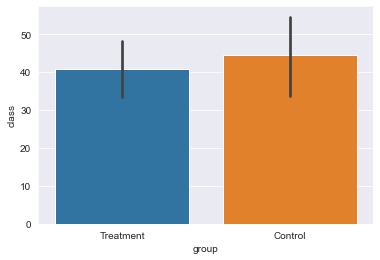

In [115]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "class", data = dataBinary_milestones_valid)
plt.show()

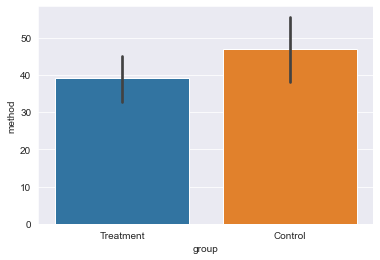

In [116]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = dataBinary_milestones_valid)
plt.show()

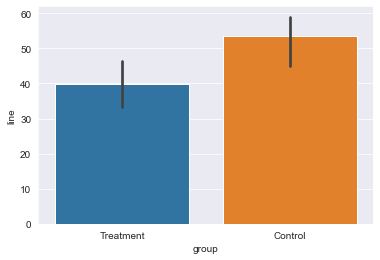

In [117]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = dataBinary_milestones_valid)
plt.show()

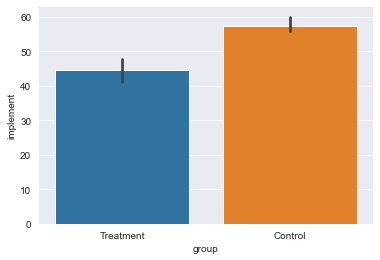

In [118]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = dataBinary_milestones_valid)
plt.show()

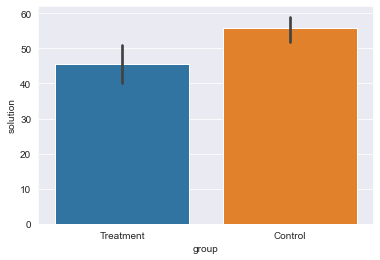

In [119]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = dataBinary_milestones_valid)
plt.show()

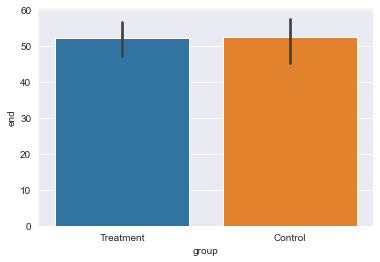

In [120]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "end", data = dataBinary_milestones_valid)
plt.show()

In [121]:

# Use GroupBy() to compute the sum
dataBinary_milestones_valid_sum = dataBinary_milestones_valid.groupby('group').sum()
print(dataBinary_milestones_valid_sum)


           issue  problem  folder   file  class  method   line  solution  \
group                                                                      
Control       55      131   209.0  210.0  222.0   234.0  214.0     223.0   
Treatment     49      177   321.0  325.0  327.0   235.0  239.0     318.0   

           implement  end  issue_number  changed issue  changed folder  \
group                                                                    
Control        172.0  315         30332              0               0   
Treatment      223.0  417         42078              0               4   

           changed file  changed class  changed method  
group                                                   
Control               0              0               0  
Treatment             3              1               0  


In [122]:
corrects = dataBinary_milestones_valid.groupby(['correct','group']).size()
corrects

correct  group    
n        Control      6
         Treatment    6
y        Treatment    2
dtype: int64

In [123]:
type(corrects)

pandas.core.series.Series

In [124]:
corrects[0]

6

In [125]:
corrects.index

MultiIndex([('n',   'Control'),
            ('n', 'Treatment'),
            ('y', 'Treatment')],
           names=['correct', 'group'])

In [126]:

#c_list = corrects.tolist()
c_list=[1,0.75,0,0.25] # normalizing: dividing by the number of experiments C/6 T/8

In [127]:
df_corrects = pd.DataFrame({'sum':c_list,'group':list('CTCT'),'correct':list('nnyy')})
df_corrects

,sum,group,correct
0,1.00,C,n
1,0.75,T,n
2,0.00,C,y
3,0.25,T,y


In [128]:
#df_corrects['sum'] = df_corrects['sum'].astype('Float64')
df_corrects[["sum"]] = df_corrects[["sum"]].apply(pd.to_numeric)

In [129]:
df_corrects['Group-correct'] = df_corrects['group']+df_corrects['correct'] 

<AxesSubplot:xlabel='Group-correct'>

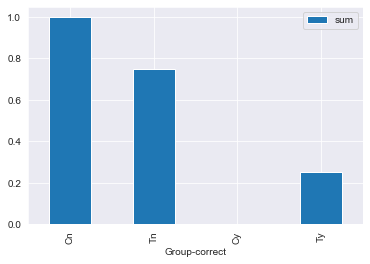

In [130]:
df_corrects.plot(x="Group-correct", y="sum", kind="bar")

In [131]:
sounds = dataBinary_milestones_valid.groupby(['sound solution','group']).size()
sounds

sound solution  group    
n               Control      4
y               Control      2
                Treatment    8
dtype: int64

In [133]:
s_list=[0.66,0,0.286,1] # normalizing: dividing by the number of experiments C/6 T/8

In [134]:
df_sound = pd.DataFrame({'sum':s_list,'group':list('CTCT'),'correct':list('nnyy')})
df_sound

,sum,group,correct
0,0.660,C,n
1,0.000,T,n
2,0.286,C,y
3,1.000,T,y


In [135]:
df_sound['Group-correct'] = df_corrects['group']+df_corrects['correct'] 

<AxesSubplot:xlabel='Group-correct'>

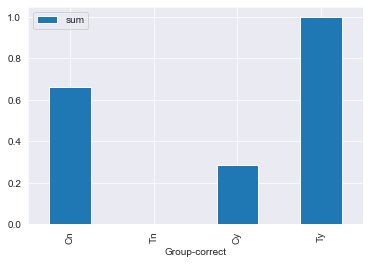

In [136]:
df_sound.plot(x="Group-correct", y="sum", kind="bar")

#'changed issue',       'changed folder', 'changed file', 'changed class', 'changed method','right folder', 'right file', 'right class', 'right method',       'right lines', 'Correctness Explanation', 'correct', 'sound solution', 'alternative answer'

In [58]:
#dataBinary

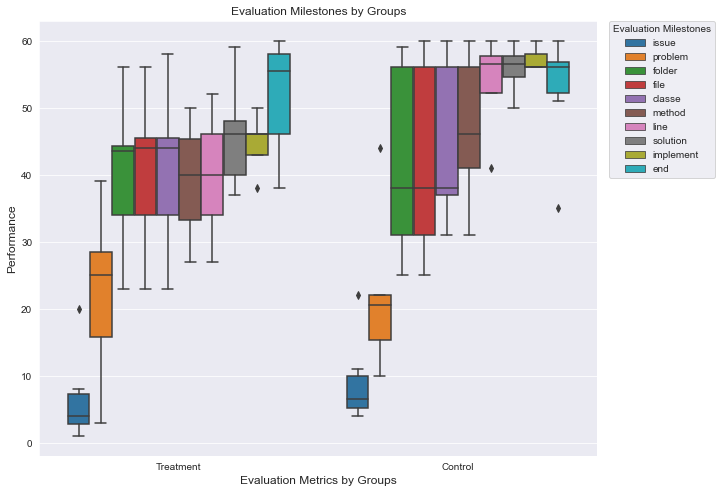

In [137]:
dd=pd.melt(dataBinary_milestones_valid,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")


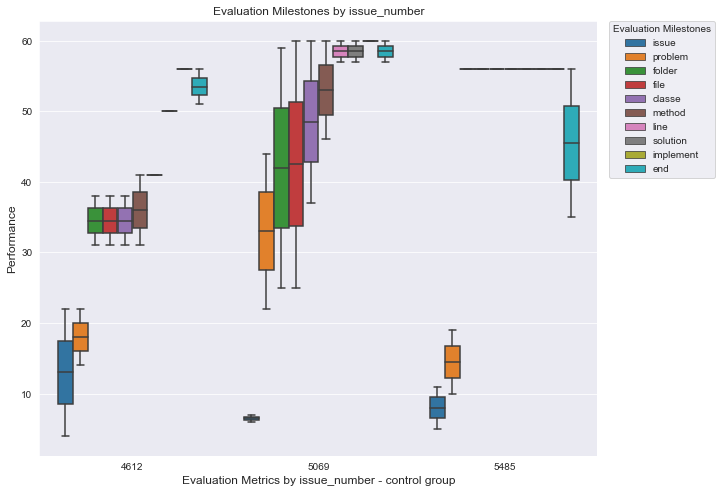

In [138]:
dd=pd.melt(dataBinary_milestones_valid_C,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

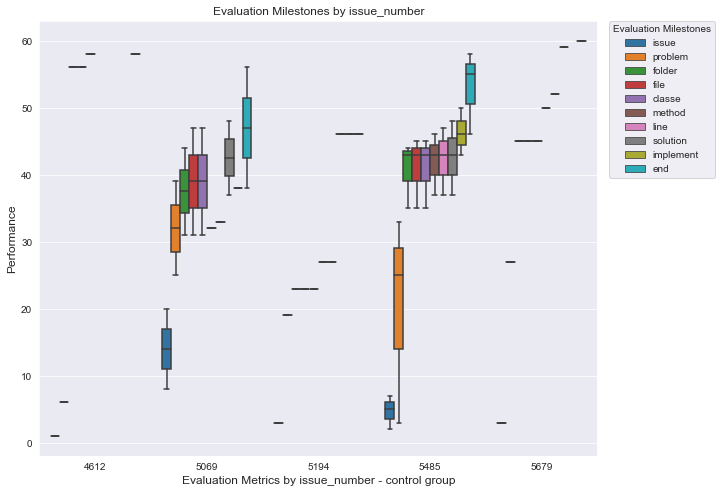

In [139]:
dd=pd.melt(dataBinary_milestones_valid_T,id_vars=['issue_number'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='issue_number',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by issue_number - control group",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by issue_number", size=12)
plt.show()

In [140]:
dataBinary_milestones_valid_5485 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5485]

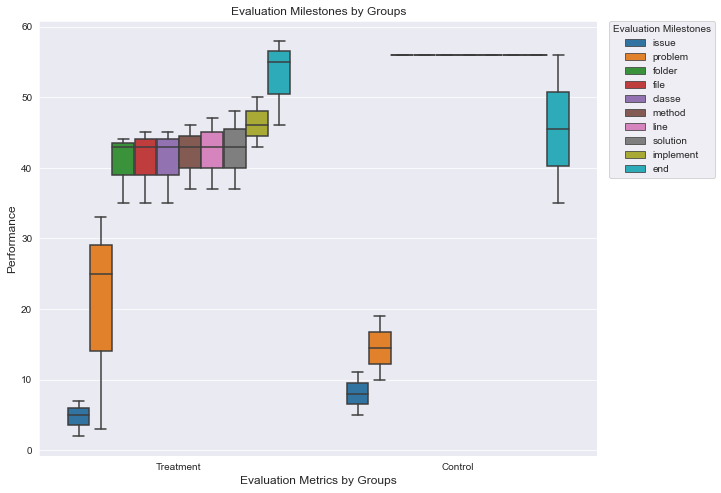

In [141]:
dd=pd.melt(dataBinary_milestones_valid_5485,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [142]:
dataBinary_milestones_valid_5485

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44.0,45.0,45.0,46.0,47.0,48.0,...,0,0,y,y,y,y,y,Completed the code changes in the right place ...,y,y
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
8,vg588@nau.edu,4:34 PM,5,25,35.0,35.0,35.0,37.0,37.0,37.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
9,ma3932@nau.edu,4:13 PM,7,33,43.0,43.0,43.0,43.0,43.0,43.0,...,0,0,NaN,y,y,y,y,Completed the code changes in the right place.,y,y
14,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n


In [143]:
dataBinary_milestones_valid_5485.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number,changed issue,changed folder,changed file,changed class,changed method
group,,,,,,,,,,,,,,,,
Control,8.000000,14.500000,56.000000,56.0,56.0,56.0,56.000000,56.000000,56.000000,45.5,5485.0,0.0,0.000000,0.0,0.0,0.0
Treatment,4.666667,20.333333,40.666667,41.0,41.0,42.0,42.333333,42.666667,46.333333,53.0,5485.0,0.0,0.333333,0.0,0.0,0.0


In [144]:
dataBinary_milestones_valid_4612 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 4612]

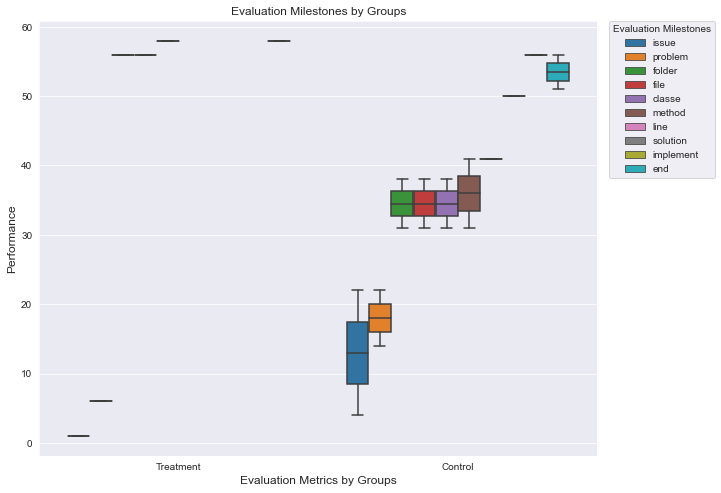

In [145]:
dd=pd.melt(dataBinary_milestones_valid_4612,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [146]:
dataBinary_milestones_valid_4612.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number,changed issue,changed folder,changed file,changed class,changed method
group,,,,,,,,,,,,,,,,
Control,13.0,18.0,34.5,34.5,34.5,36.0,41.0,50.0,56.0,53.5,4612.0,0.0,0.0,0.0,0.0,0.0
Treatment,1.0,6.0,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58.0,4612.0,0.0,2.0,2.0,0.0,0.0


In [147]:
dataBinary_milestones_valid_4612

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
2,gk325@nau.edu,3:09:00 PM,1,6,56.0,56.0,58.0,NaN,NaN,NaN,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n


In [148]:
dataBinary_milestones_valid_5069 = dataBinary_milestones_valid[dataBinary_milestones_valid.issue_number == 5069]

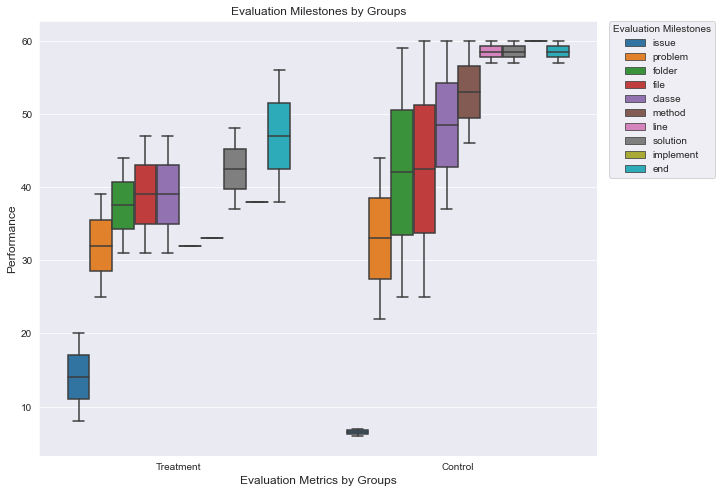

In [149]:
dd=pd.melt(dataBinary_milestones_valid_5069,id_vars=['group'],value_vars=['issue','problem','folder','file','class','method','line','solution','implement','end'],var_name='Evaluation Milestones')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='group',data=dd,hue='Evaluation Milestones')
plt.ylabel("Performance", size=12)
plt.xlabel("Evaluation Metrics by Groups",size=12)

labels=['issue','problem','folder','file','classe','method','line','solution','implement','end']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Evaluation Milestones",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title("Evaluation Milestones by Groups", size=12)
plt.show()
#plt.savefig("grouped_boxplot_AlgorithmBinary.png")

In [150]:
dataBinary_milestones_valid_5069.groupby(['group']).mean()

,issue,problem,folder,file,class,method,line,solution,implement,end,issue_number,changed issue,changed folder,changed file,changed class,changed method
group,,,,,,,,,,,,,,,,
Control,6.5,33.0,42.0,42.5,48.5,53.0,58.5,58.5,60.0,58.5,5069.0,0.0,0.0,0.0,0.0,0.0
Treatment,14.0,32.0,37.5,39.0,39.0,32.0,33.0,42.5,38.0,47.0,5069.0,0.0,0.0,0.0,0.0,0.0


In [151]:
dataBinary_milestones_valid_5069

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
5,hk486@nau.edu,3:22 PM,20,25,31.0,31.0,31.0,32.0,33.0,37.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
12,jk2396@nau.edu,5:03 PM,8,39,44.0,47.0,47.0,NaN,NaN,48.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
15,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y


In [152]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [153]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [170]:
#Subsetting data to compute Stats

C_df = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Control']
T_df = dataBinary_milestones_valid[dataBinary_milestones_valid.group == 'Treatment']

C_issue = C_df['issue']
T_issue = T_df['issue']

C_problem = C_df['problem']
T_problem = T_df['problem']




In [155]:
C_issue

4      4
7     11
10     7
11    22
14     5
15     6
Name: issue, dtype: int64

In [156]:
T_issue

1      2
2      1
3      3
5     20
8      5
9      7
12     8
13     3
Name: issue, dtype: int64

In [157]:
C_df

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,changed class,changed method,right folder,right file,right class,right method,right lines,Correctness Explanation,correct,sound solution
4,gummadisk99@gmail.com,1:20 PM,4,14,38.0,38.0,38.0,41.0,41.0,50.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,n
7,kv582@nau.edu,12:44 PM,11,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
10,"nk545@nau,edu",3:14 PM,7,22,25.0,25.0,37.0,46.0,57.0,57.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,y
11,sm4332@nau.edu,3:12 PM,22,22,31.0,31.0,31.0,31.0,NaN,NaN,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
14,st2364@nau.edu,3:09 PM,5,10,56.0,56.0,56.0,56.0,56.0,56.0,...,0,0,NaN,n,n,n,n,He did not find the correct folder or any othe...,n,n
15,klp468@nau.edu,12:18 PM,6,44,59.0,60.0,60.0,60.0,60.0,60.0,...,0,0,n,n,n,n,n,He did not find the correct folder or any othe...,n,y


In [158]:
C_line = C_df['line'].dropna()
C_line




4     41.0
10    57.0
14    56.0
15    60.0
Name: line, dtype: float64

In [159]:
T_line = T_df['line'].dropna()
T_line


1     47.0
3     27.0
5     33.0
8     37.0
9     43.0
13    52.0
Name: line, dtype: float64

In [168]:
C_implement = C_df['implement'].dropna()
T_implement = T_df['implement'].dropna()

C_solution = C_df['solution'].dropna()
T_solution = T_df['solution'].dropna()

C_method = C_df['method'].dropna()
T_method = T_df['method'].dropna()

C_folder = C_df['folder'].dropna()
T_folder = T_df['folder'].dropna()

C_file = C_df['file'].dropna()
T_file = T_df['file'].dropna()

C_class = C_df['class'].dropna()
T_class = T_df['class'].dropna()

In [165]:
dataBinary_milestones_valid_nan = dataBinary_milestones_valid.dropna()

In [172]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(C_issue, T_issue)
print('Issue Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    # compare samples
stat, p = mannwhitneyu(C_problem, T_problem)
print('Problem Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
    # compare samples
stat, p = mannwhitneyu(C_folder, T_folder)
print('Folder Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')    

        # compare samples
stat, p = mannwhitneyu(C_file, T_file)
print('File Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
    # compare samples
stat, p = mannwhitneyu(C_class, T_class)
print('Class Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')    
    
    # compare samples
stat, p = mannwhitneyu(C_method, T_method)
print('Method Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
    # compare samples
stat, p = mannwhitneyu(C_line, T_line)
print('Line Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    # compare samples
stat, p = mannwhitneyu(C_solution, T_solution)
print('Solution Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

# compare samples
stat, p = mannwhitneyu(C_implement, T_implement)
print('Implement Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(C_issue, T_issue))

print(cliffsDelta(C_problem, T_problem))

print(cliffsDelta(C_folder, T_folder))

print(cliffsDelta(C_file, T_file))

print(cliffsDelta(C_class, T_class))

print(cliffsDelta(C_line, T_line))

print(cliffsDelta(C_implement, T_implement))

print(cliffsDelta(C_solution, T_solution))



Issue Statistics=34.000, p=0.219
Same distribution (fail to reject H0)
Problem Statistics=20.500, p=0.698
Same distribution (fail to reject H0)
Folder Statistics=21.000, p=0.941
Same distribution (fail to reject H0)
File Statistics=21.000, p=0.941
Same distribution (fail to reject H0)
Class Statistics=22.500, p=0.769
Same distribution (fail to reject H0)
Method Statistics=20.500, p=0.360
Same distribution (fail to reject H0)
Line Statistics=21.000, p=0.067
Same distribution (fail to reject H0)
Solution Statistics=25.000, p=0.046
Different distribution (reject H0)
Implement Statistics=15.000, p=0.035
Different distribution (reject H0)
(0.4166666666666667, 'medium')
(-0.14583333333333334, 'negligible')
(0.05, 'negligible')
(0.05, 'negligible')
(0.125, 'negligible')
(0.75, 'large')
(1.0, 'large')
(0.7857142857142857, 'large')


In [ ]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [186]:
df_issue = dataBinary_milestones_valid[['issue','group']].dropna()
df_problem = dataBinary_milestones_valid[['problem','group']].dropna()
df_folder = dataBinary_milestones_valid[['folder','group']].dropna()
df_file = dataBinary_milestones_valid[['file','group']].dropna()
df_class = dataBinary_milestones_valid[['class','group']].dropna()
df_method = dataBinary_milestones_valid[['method','group']].dropna()
df_line = dataBinary_milestones_valid[['line','group']].dropna()
df_solution = dataBinary_milestones_valid[['solution','group']].dropna()
df_implement = dataBinary_milestones_valid[['implement','group']].dropna()

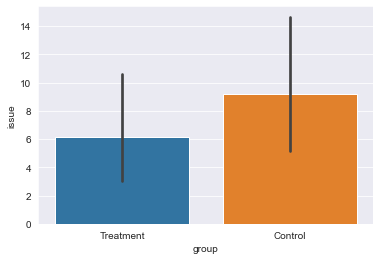

In [190]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "issue", data = df_issue)
plt.show()

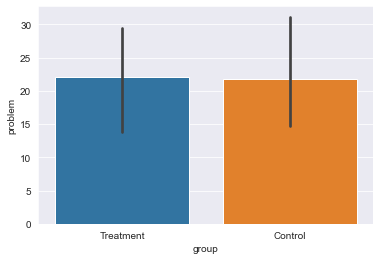

In [191]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "problem", data = df_problem)
plt.show()

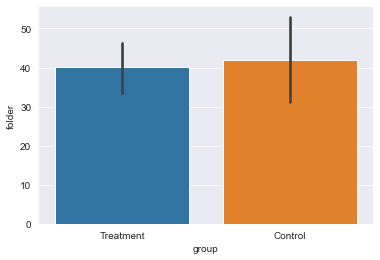

In [192]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "folder", data = df_folder)
plt.show()

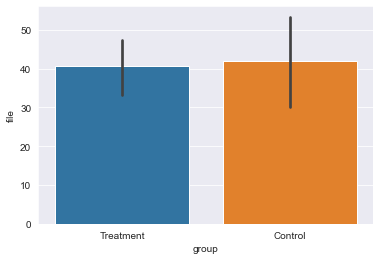

In [193]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "file", data = df_file)
plt.show()

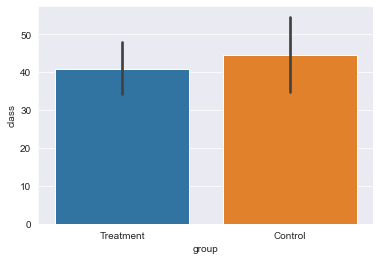

In [194]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "class", data = df_class)
plt.show()

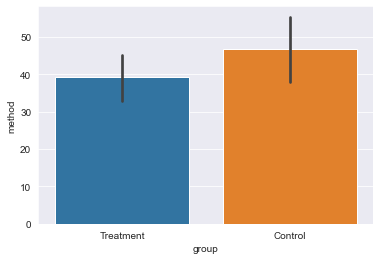

In [195]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "method", data = df_method)
plt.show()

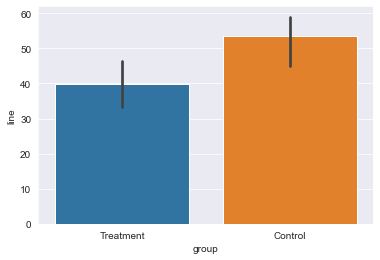

In [196]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "line", data = df_line)
plt.show()

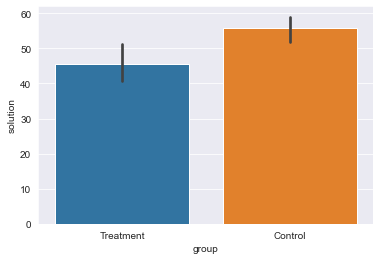

In [197]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "solution", data = df_solution)
plt.show()

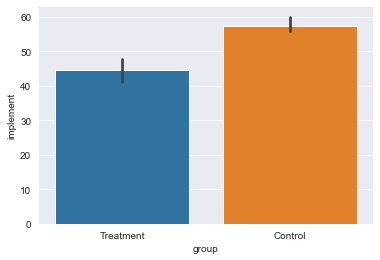

In [198]:
import seaborn as sns

# Set Seaborn style
sns.set_style('darkgrid')
# Import Data
#titanic_dataset = sns.load_dataset("titanic")

# Construct plot
sns.barplot(x = "group", y = "implement", data = df_implement)
plt.show()